In [1]:
import scipy.io as scio
import numpy as np
import math
import os
import cv2
from matplotlib import pyplot as plt
from skimage import metrics
from tqdm.notebook import tqdm

def ssim(x,y):
    return metrics.structural_similarity(x,y)

def psnr(x,y):
    mse = np.mean((x-y)**2)
    psnr_result = 10*math.log10(1/mse) #针对浮点型数据，最大像素值为 1
    return psnr_result

def read_mat(index):
    noise_file = "brain" + str(index) + "_X.mat"
    noise_dir = os.path.join("E:\\文件\\大学\\大二上\\模拟电路\\project\\project_data\\Signal_withnoise", noise_file)
    X = scio.loadmat(noise_dir)
    truth_file = "brain" + str(index) + "_Y.mat"
    truth_dir = os.path.join("E:\\文件\\大学\\大二上\\模拟电路\\project\\project_data\\Ground_truth", truth_file)
    Y = scio.loadmat(truth_dir)
    return {**X,**Y}

def draw(result, noise, truth):
    fig=plt.figure(num=1,figsize=(4,4))
    ax1=fig.add_subplot(221)
    ax1.imshow(result,aspect='auto')
    ax1.set_title("result")
    ax2=fig.add_subplot(222)
    ax2.imshow(noise,aspect='auto')
    ax2.set_title("signal_withnoise")
    ax3=fig.add_subplot(223)
    ax3.imshow(truth,aspect='auto')
    ax3.set_title("ground_truth")
    plt.show()

In [2]:
test_data = read_mat(7) #'X':signal_withnoise, 'Y':ground_truth

In [20]:
data = []
noise = []
for i in tqdm(range(6)):
    data.append(read_mat(i+1))
    if i == 0:
        noise.append(data[i]['X']-data[i]['Y'])
    else:
        noise += data[i]['X']-data[i]['Y']
noise /= 6
test_data = read_mat(7)
result = test_data['X'] - noise

  0%|          | 0/6 [00:00<?, ?it/s]

In [18]:
#高斯滤波
#result = cv2.GaussianBlur(test_data['X'],(11,11),0)


#均值滤波
#result = cv2.blur(test_data['X'],(7,7))

#双边滤波
#result = cv2.bilateralFilter(test_data['X'],9,75,75)



26.92452428484045
28.043541826568426


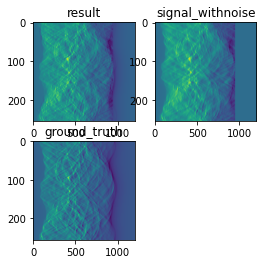

0.58746396838497
0.7433423999304691


In [21]:
result = result[0]
p1 = psnr(test_data['X'],test_data['Y'])
p2 = psnr(result, test_data['Y'])
print(psnr(test_data['X'],test_data['Y']))
print(psnr(result, test_data['Y']))
draw(result,test_data['X'],test_data['Y'])
print(ssim(test_data['X'],test_data['Y']))
print(ssim(result, test_data['Y']))

In [19]:
# utils
def visualize(item: tuple):
    fig=plt.figure(num=1,figsize=(12,4))
    ax1=fig.add_subplot(131)
    ax1.imshow(item[0], aspect='auto')
    ax1.set_title("x")
    
    ax2=fig.add_subplot(132)
    ax2.imshow(item[1], aspect='auto')
    ax2.set_title("y")
    
    ax3=fig.add_subplot(133)
    ax3.imshow(item[2], aspect='auto')
    ax3.set_title("y_pred")
    
    plt.suptitle(f'Original PSNR: {item[3]:.4f}  Treated PSNR: {item[4]:.4f}')
    
    plt.show()

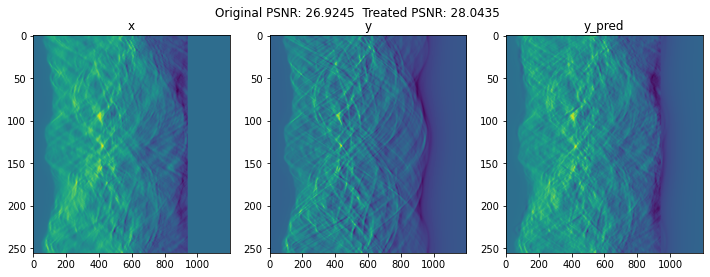

In [30]:
visualize((test_data['X'],test_data['Y'],result[0] ,p1,p2))

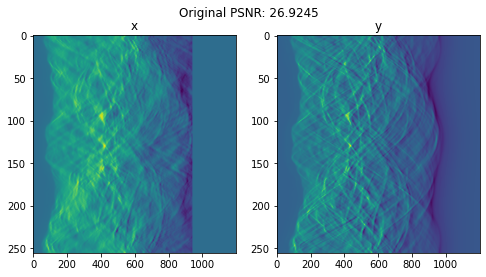

In [33]:
fig=plt.figure(num=1,figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.imshow(test_data['X'], aspect='auto')
ax1.set_title("x")
ax2=fig.add_subplot(122)
ax2.imshow(test_data['Y'], aspect='auto')
ax2.set_title("y")
plt.suptitle(f'Original PSNR: {p1:.4f}')
plt.show()

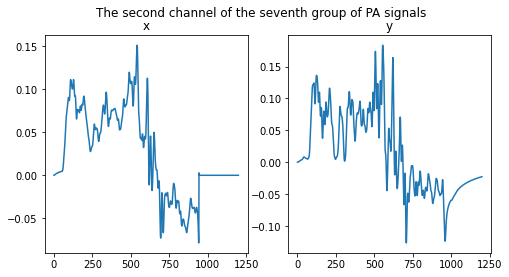

In [40]:
x = np.arange(1200)

fig=plt.figure(num=1,figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.plot(x, test_data['X'][1])
ax1.set_title("x")
ax2=fig.add_subplot(122)
ax2.plot(x, test_data['Y'][1])
ax2.set_title("y")
plt.suptitle('The second channel of the seventh group of PA signals')
plt.show()